# The Perceptron

Based on a simple (the simplest) nerual net.

![http://i.stack.imgur.com/KUvpQ.png](http://i.stack.imgur.com/KUvpQ.png)


$h(x) = sign((\sum{w_ix_i}) - threshold)$

Can simplify by adding an artificial coordinate $x_0$ and $w_0$  where $x_0 = 1$ 

This makes it easy

$h(x) = sign(\sum{w_ix_i})$

or in vector notation

$h(x) = sign(w \cdot x)$



## So, how is this a learning system?

We need a learning algorithm

Supervised Learning requires a training set where we have some data and we know the answer.

1. Given a training set of $\vec x,\vec y$
2. Classify all of the points in $\vec x$
3. Pick a point $n$ from $\vec x$ that was misclassified
4. update the weight vector $\vec w$ using: $\vec w = \vec w + y_n \vec w_n$

Repeat 2 -- 4 until all points are classified correctly.  OR at some upper limit of iteration.


See https://datasciencelab.wordpress.com/2014/01/10/machine-learning-classics-the-perceptron/ for a nice writeup.

In [1]:
%matplotlib inline
import numpy as np
import random
import pandas as pd
import seaborn as sbn
sbn.set()
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
from IPython.html import widgets

#ts = [np.array([1,5,10]), np.array([1,3,11]), np.array([1,7,10]), np.array([1,2,3]), np.array([1,6,2]),np.array([1,1,1])]
#cls = [1,1,1,-1,-1,-1]
ts = [np.array([1,.4,.6]),np.array([1,.5,.2]),np.array([1,.8,.7]),np.array([1,.7,.9])]
cls = [-1,1,-1,1]
w = np.array([1,1,1])


/usr/local/lib/python3.4/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
class Perceptron:
    def __init__(self, ts, tc):
        self.training_set = ts
        self.classes = tc
        self.weights = np.array([1 for i in range(len(ts[0]))])
        
    def classify(self, x):
        return np.sign(np.dot(x, self.weights))
    
    def learn(self, limit=10000):
        done = False
        count = 0
        bestWeights = self.weights
        leastWrong = len(self.training_set)

        while not done and count < limit:
            count += 1
            self.correct = []
            self.incorrect = []

            # first classify all points

            for ix,i in enumerate(self.training_set):
                if self.classify(i) == self.classes[ix]:
                    self.correct.append(ix)
                else:
                    self.incorrect.append(ix)

            if len(self.incorrect) == 0:
                print("Done!", self.weights)
                done = True
            else:
                if len(self.incorrect) < leastWrong:
                    leastWrong = len(self.incorrect)
                    bestWeights = self.weights
                p = random.randrange(len(self.incorrect))
                y = self.training_set[self.incorrect[p]]
                self.weights = self.weights + y*self.classes[self.incorrect[p]]
                #print(len(self.incorrect), self.weights)
        if not done:
            self.weights = bestWeights
        self.plot()
        
    def plot(self):
        cols = []
        xvals = list(map(lambda x: x[1], self.training_set))
        cmap = list(map(lambda x: 'red' if x < 0 else 'blue', self.classes))
        plt.scatter(xvals, list(map(lambda x: x[2], self.training_set)), c=cmap)
        #slope, intcpt = -self.weights[1]/self.weights[2], -self.weights[0]/self.weights[2]
        #xvals = np.linspace(min(xvals), max(xvals))
        #plt.plot(xvals, slope*xvals+intcpt)
            
#p = Perceptron(ts, cls)
#interact(p.learn, limit=widgets.widget_int.IntSlider(min=0, max=10, step=1, value=1))

#p.learn()

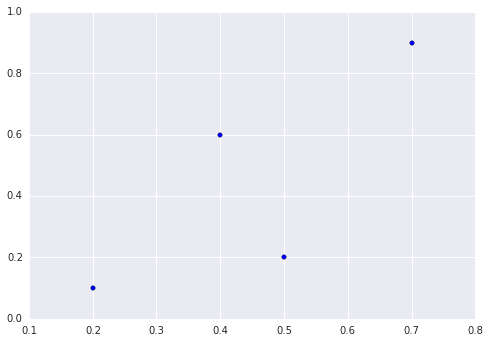

In [41]:
plt.scatter(list(map(lambda x: x[1],ts)),list(map(lambda x: x[2],ts)))

### Lets look at a classic dataset in machine learning.  The iris dataset

Attribute Information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

Since we only can do a binary classification right now, lets look at setosa versus virginica


In [3]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
len(iris)

150

In [100]:
#df = pd.read_csv('../Data/iris.csv',header=None)
df = iris
df.columns = ['sepallen','sepalwidth','petallen','petalwidth','kind']

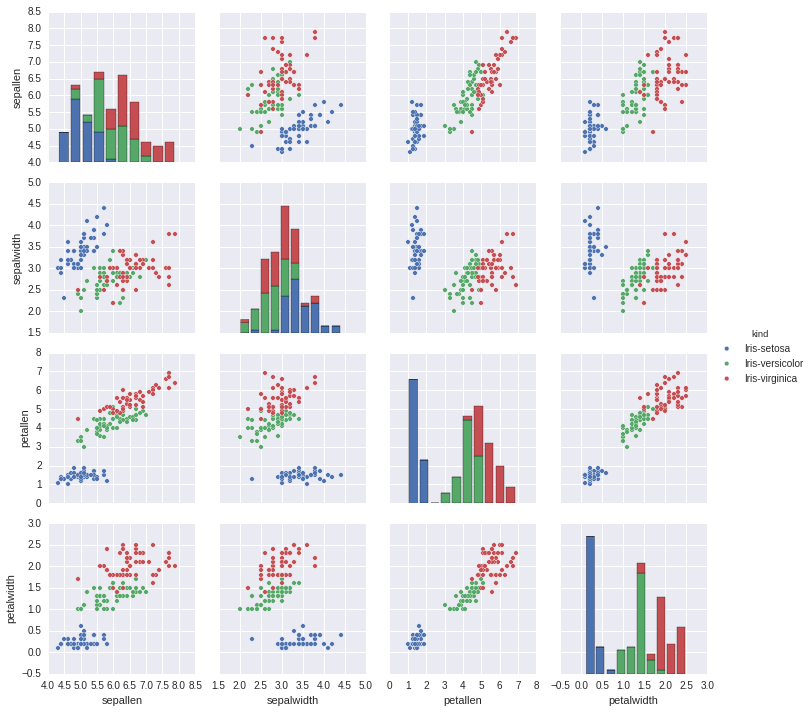

In [5]:
c = df[(df.kind == 'Iris-setosa') | (df.kind == 'Iris-virginica')]
sbn.pairplot(df[['sepallen','sepalwidth','petallen','petalwidth', 'kind']], hue = 'kind')

### Lets try

Convert this into something we can use with our simple perceptron learning algorithm and see if it works.


Done! [-1.3 -4.3  6.2  3.4]


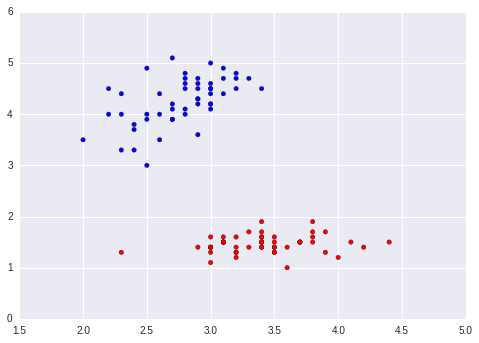

In [4]:
xx = iris.iloc[0:100,[0, 1, 2, 3]].values
y = iris.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)
ip = Perceptron(iris.iloc[0:100, [0,1,2,3]].values, y)
ip.learn()



Done! [ 1.2  4.9 -8.5 -4.2]


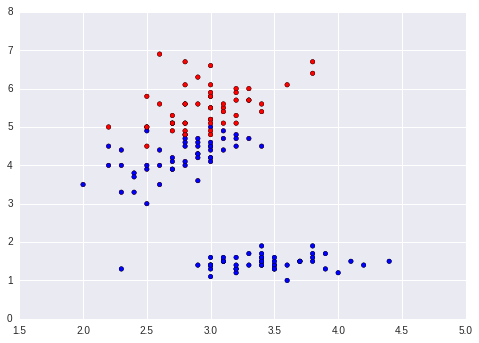

In [90]:
a = iris.iloc[0:150,[0, 1, 2, 3]].values
y = iris.iloc[0:150, 4].values
y = np.where(y=='Iris-setosa', 1, -1)
sp = Perceptron(iris.iloc[0:150, [0,1,2,3]].values, y)
sp.learn()

#b = iris.iloc[50:150, [0,1,2,3]].values
z = iris.iloc[0:150, 4].values
z = np.where(z=='Iris-virginica', -1, 1)
vp = Perceptron(iris.iloc[0:150, [0, 1, 2, 3]].values, z)
vp.learn()

Done! [ 0.9  6.5 -8.9 -3.5]
29 out of 30
96.66666666666667% correct


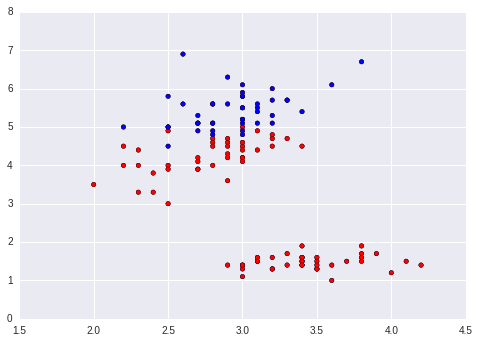

In [10]:
traindata = iris.iloc[0:150, [0,1,2,3]].sample(120)
traincats = iris.iloc[traindata.index, 4]
testSet = iris.iloc[0:150, [0, 1, 2, 3]].drop(traindata.index)
categories = iris.iloc[testSet.index, 4]
testSet = testSet.values

traincats = traincats.map(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-virginica' else 2)
categories = categories.map(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-virginica' else 2)

traindata = traindata.values
traincats = traincats.values
categories = categories.values

traincats1 = np.where(traincats == 0, 1, -1)
test1 = Perceptron(traindata, traincats1)
test1.learn()

traincats2 = np.where(traincats == 1, 1, -1)
test2 = Perceptron(traindata, traincats2)
test2.learn()

total = len(testSet)
correct = 0
results = []
nonSetosa = []


for ix, i in enumerate(testSet):
    current = i
    index = ix
    if test1.classify(current) > 0:    
        if categories[index] == 0:
            correct += 1
    elif test2.classify(current) > 0:
        if categories[index] == 1:
            correct += 1
    elif test2.classify(current) < 0:
        if categories[index] == 2:
            correct += 1

            
print(str(correct) + " out of " + str(total))
print(str(((correct / total) * 100)) + "% correct")

In [112]:
categories

array([2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1,
       1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 1,
       1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1,
       2, 2, 0, 1, 0])

In [111]:
#from class
class multiPerceptron:
    def __init__(self, ts, cls):
        self.training_set = ts
        self.classes = cls
        self.numClasses = len(np.unique(cls))
        self.allPerceptrons = dict()
        for i in np.unique(cls):
            self.allPerceptrons[i] = Perceptron(ts, np.where(cls == i, 1, -1))
            
    def learn(self):
        for p in self.allPerceptrons.values():
            p.learn()
            
    def classify(self, x):
        for cls in self.allPerceptrons:
            if self.allPerceptrons[cls].classify(x) > 0:
                return cls

            
        

### Lets look at a more interesting dataset

Predicting the incidence of diabetes in the Pima Indian population  using the `pima-indians-diabetes.data` file.

The columns of the file are as follows:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)



In [42]:
df = pd.read_csv('../Data/pima-indians-diabetes.data',header=None)
df.columns = ['ntp','glucose','bp','tsft','insulin','bmi','dpf','age','class']

In [43]:
df.head()

,ntp,glucose,bp,tsft,insulin,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


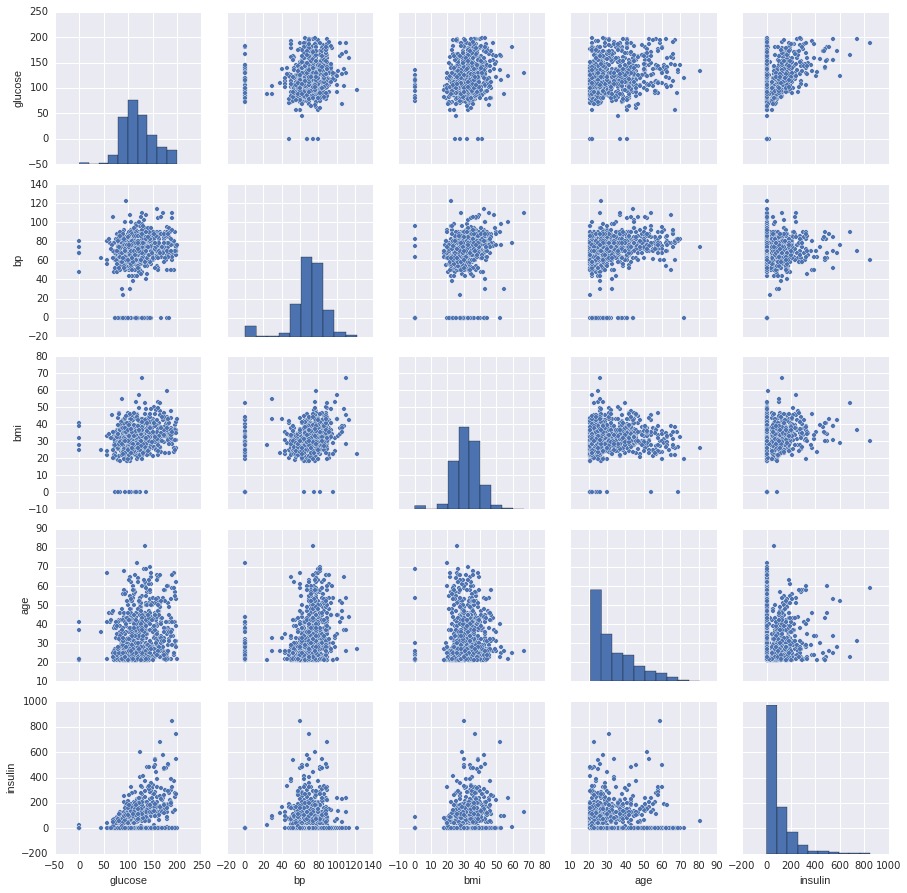

In [48]:
sbn.pairplot(df[['glucose','bp','bmi','age','insulin']])